Plot for complete markets

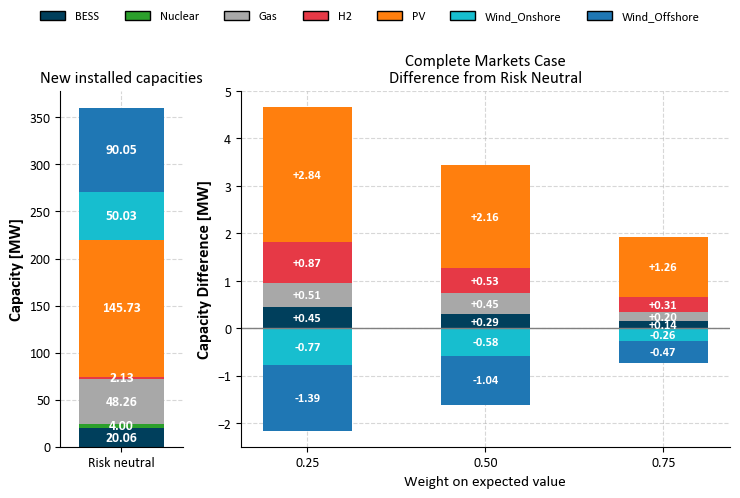

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\risk_aversion_results_O30_T672_new_final_unserved_fix_flex_gaspricescaled_cinvEldescheap_conwind.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("complete.png", dpi=400, bbox_inches='tight')

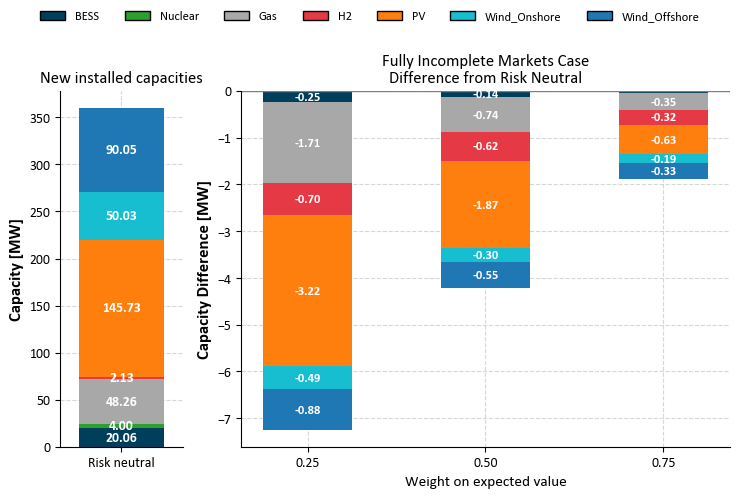

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Fully_incomplete_markets_ADMM\H2_15000_ADMM_risk_aversion_results_O30_T672_new_final_FINAL.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Fully Incomplete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("inomplete.png", dpi=400, bbox_inches='tight')

| Metric         | Based on          | What it Tells You                                                                            |
| -------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| `total_demand` | `weighted_demand` | Total energy consumed over the year (in MWh), accounting for weights (e.g., time fractions). |
| `max_load`     | `load`            | Highest instantaneous demand (e.g., peak in MW).                                             |
| `min_load`     | `load`            | Lowest observed demand.                                                                      |
| `mean_load`    | `load`            | Average demand across all time steps.                                                        |
| `median_load`  | `load`            | The "middle" value — half the values are above, half below.                                  |
| `std_load`     | `load`            | Standard deviation — how much demand fluctuates around the mean.                             |
| `range_load`   | `load`            | Difference between max and min — indicates spread.                                           |
| `p10_load`     | `load`            | 10th percentile — 10% of values are below this.                                              |
| `p90_load`     | `load`            | 90th percentile — 90% of values are below this.                                              |


In [6]:

import pandas as pd
import numpy as np

# Weighted std function
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values - average) ** 2, weights=weights)
    return np.sqrt(variance)

# Weighted quantile function
def weighted_quantile(values, weights, quantile):
    values = np.array(values)
    weights = np.array(weights)
    
    sorter = np.argsort(values)
    values = values[sorter]
    weights = weights[sorter]
    
    cumulative_weight = np.cumsum(weights)
    total_weight = cumulative_weight[-1]
    
    return values[np.searchsorted(cumulative_weight, quantile * total_weight)]


# Load the uploaded data
load_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_load_profiles_672_30yr_new.csv")
weights_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_weights_672_30yr_new.csv")

# Merge load and weight data
merged_df = pd.merge(load_df, weights_df, on=["T", "O"], how="inner")

# Compute weighted demand per timestep
merged_df["weighted_demand"] = merged_df["load"] * merged_df["weight"]

# Now build demand_stats with weighted metrics
demand_stats = (
    merged_df.groupby("O")
    .apply(lambda group: pd.Series({
        "total_demand": group["weighted_demand"].sum(),
        "total_weight": group["weight"].sum(),
        "average_load": group["weighted_demand"].sum() / group["weight"].sum(),
        "max_load": group["load"].max(),
        "min_load": group["load"].min(),
        #"mean_load": np.average(group["load"], weights=group["weight"]),
        "std_load": weighted_std(group["load"], group["weight"]),
        "range_load": group["load"].max() - group["load"].min(),
        "p10_load": weighted_quantile(group["load"], group["weight"], 0.10),
        "p90_load": weighted_quantile(group["load"], group["weight"], 0.90),
    }))
    .reset_index()
)

print(demand_stats)
demand_stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\demand_stats.csv", index=False)
# Define the tail scenarios
tail_scenarios = {2, 3, 6, 9, 10, 14, 15, 17, 18, 19, 20, 21, 25, 28}

# First, calculate total demand per scenario
total_demand_per_scenario = (
    merged_df.groupby("O", as_index=False)["weighted_demand"]
    .sum()
    .rename(columns={"weighted_demand": "total_demand"})
)
#print(total_demand_per_scenario)
# Split the scenarios
tail_df = total_demand_per_scenario[total_demand_per_scenario["O"].isin(tail_scenarios)]
non_tail_df = total_demand_per_scenario[~total_demand_per_scenario["O"].isin(tail_scenarios)]

# Calculate average total demand for each group
average_tail_demand = tail_df["total_demand"].mean()
average_non_tail_demand = non_tail_df["total_demand"].mean()

print("Average total demand (tail scenarios):", average_tail_demand)
print("Average total demand (non-tail scenarios):", average_non_tail_demand)


     O  total_demand  total_weight  average_load  max_load  min_load  \
0    1   5795.866199        8760.0      0.661629  0.935079  0.426762   
1    2   5694.585716        8760.0      0.650067  0.926317  0.444177   
2    3   5626.716457        8760.0      0.642319  0.931598  0.428581   
3    4   5815.532696        8760.0      0.663874  0.925387  0.444527   
4    5   5693.382130        8760.0      0.649929  0.946325  0.437674   
5    6   5495.396293        8760.0      0.627328  0.933371  0.396539   
6    7   5723.973734        8760.0      0.653422  0.927324  0.439406   
7    8   5764.580473        8760.0      0.658057  0.935021  0.446177   
8    9   5542.032482        8760.0      0.632652  0.907647  0.419137   
9   10   5542.032481        8760.0      0.632652  0.908546  0.439515   
10  11   5723.973734        8760.0      0.653422  0.938159  0.449913   
11  12   5723.973734        8760.0      0.653422  0.943096  0.440099   
12  13   5815.532695        8760.0      0.663874  0.928620  0.47

C:\Users\user\AppData\Local\Temp\ipykernel_33788\3211113593.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


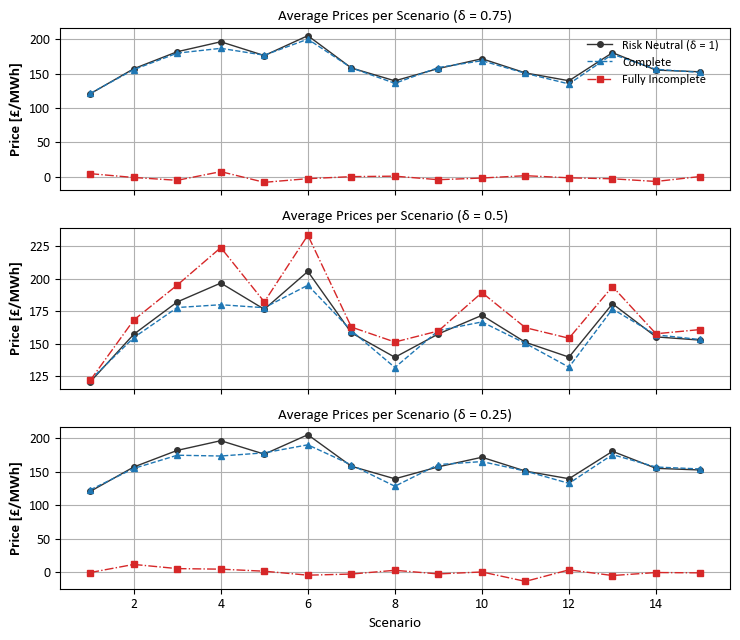

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    120.8855,  # Scenario 1
    157.3509,  # Scenario 4
    182.1469,  # Scenario 7
    196.5904,  # Scenario 8
    176.4971,  # Scenario 11
    205.4936,  # Scenario 12
    158.4395,  # Scenario 13
    139.7145,  # Scenario 19
    157.6293,  # Scenario 22
    171.8752,  # Scenario 23
    151.2024,  # Scenario 24
    139.8418,  # Scenario 26
    180.7323,  # Scenario 27
    155.3469,  # Scenario 29
    152.9040   # Scenario 30
]
price_complete_075 = [
    121.3414,  # Scenario 1
    156.0683,  # Scenario 4
    180.0571,  # Scenario 7
    187.0488,  # Scenario 8
    177.0477,  # Scenario 11
    200.4178,  # Scenario 12
    158.6189,  # Scenario 13
    136.0942,  # Scenario 19
    159.1142,  # Scenario 22
    169.0297,  # Scenario 23
    150.6668,  # Scenario 24
    135.1878,  # Scenario 26
    178.4729,  # Scenario 27
    156.4974,  # Scenario 29
    152.0604   # Scenario 30
]
price_incomplete_075 = np.random.normal(0, 5, 15)
price_complete_050 = [
    122.2688,  # Scenario 1
    154.8055,  # Scenario 4
    177.8473,  # Scenario 7
    179.9779,  # Scenario 8
    177.7166,  # Scenario 11
    194.9383,  # Scenario 12
    160.1560,  # Scenario 13
    131.8733,  # Scenario 19
    160.1837,  # Scenario 22
    166.8051,  # Scenario 23
    150.3419,  # Scenario 24
    132.1367,  # Scenario 26
    176.7039,  # Scenario 27
    156.8883,  # Scenario 29
    153.3610   # Scenario 30
]
price_incomplete_050 = [
    122.0735,  # Scenario 1
    168.2576,  # Scenario 4
    195.0704,  # Scenario 7
    223.7529,  # Scenario 8
    182.1576,  # Scenario 11
    233.2616,  # Scenario 12
    162.8601,  # Scenario 13
    151.4084,  # Scenario 19
    159.887,  # Scenario 22
    189.293,  # Scenario 23
    162.3917,  # Scenario 24
    154.3101,  # Scenario 26
    193.9301,  # Scenario 27
    157.7401,  # Scenario 29
    160.9143   # Scenario 30
]
price_complete_025 = [
    123.2041,  # Scenario 1
    155.2124,  # Scenario 4
    174.8955,  # Scenario 7
    173.7197,  # Scenario 8
    178.4617,  # Scenario 11
    190.4364,  # Scenario 12
    160.4389,  # Scenario 13
    128.6188,  # Scenario 19
    160.9868,  # Scenario 22
    165.4314,  # Scenario 23
    151.2388,  # Scenario 24
    132.9228,  # Scenario 26
    175.8153,  # Scenario 27
    157.2953,  # Scenario 29
    154.4357   # Scenario 30
]
price_incomplete_025 = np.random.normal(0, 5, 15)
# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Fully Incomplete': {'marker': 's', 'label': 'Fully Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Fully Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Fully Incomplete'],
            color=colors['Fully Incomplete'],
            marker=markers['Fully Incomplete']['marker'],
            markersize=4,
            label=markers['Fully Incomplete']['label'])
    ax.set_ylabel("Price [$/MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Average Prices per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=1, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17040\2218279380.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


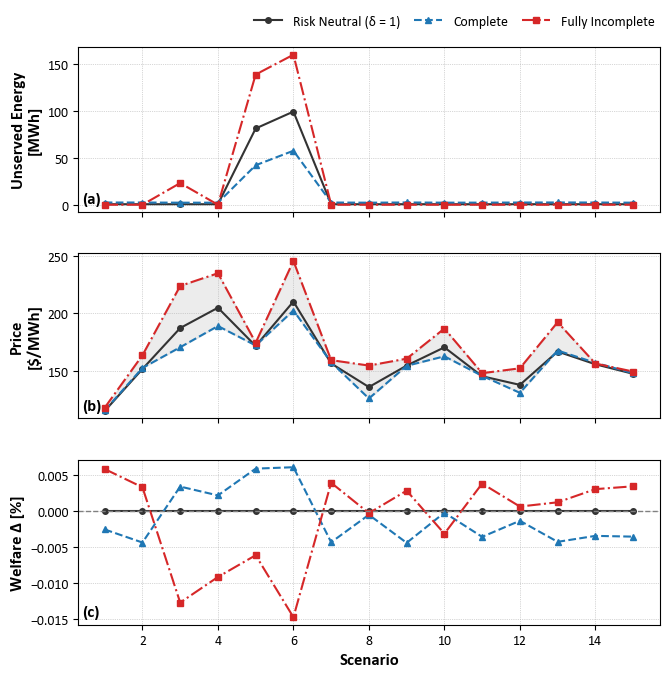

'\n# === Legend only at top subplot ===\n#axs[0].legend( loc=\'upper right\',frameon=True, ncol=1, prop=font_legend)\naxs[0].legend( frameon=True, ncol=1, prop=font_legend)\n\n# === Final Layout ===\nplt.tight_layout()\n\n# === Optional: Save as High-Res PDF ===\n# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches=\'tight\')\n\nplt.show()\n'

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['text.usetex'] = False
rcParams['axes.labelweight'] = 'bold'

# === Font Settings ===
font_label = {'fontsize': 12, 'fontweight': 'bold'}
font_tick = {'labelsize': 10}
font_legend = FontProperties(size=10)


scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    115.3241,  # scenario 1
    151.7462,  # scenario 4
    187.3067,  # scenario 7
    204.9442,  # scenario 8
    171.7689,  # scenario 11
    210.3167,  # scenario 12
    156.5636,  # scenario 13
    136.0773,  # scenario 19
    154.7260,  # scenario 22
    170.5634,  # scenario 23
    145.4769,  # scenario 24
    137.9820,  # scenario 26
    166.9231,  # scenario 27
    155.8754,  # scenario 29
    147.5805   # scenario 30
]

price_complete_050 = [
    115.8506,  # scenario 1
    152.6653,  # scenario 4
    170.6475,  # scenario 7
    189.0635,  # scenario 8
    172.1956,  # scenario 11
    202.5322,  # scenario 12
    157.5566,  # scenario 13
    126.1553,  # scenario 19
    154.5459,  # scenario 22
    162.7749,  # scenario 23
    145.8053,  # scenario 24
    131.0895,  # scenario 26
    167.8068,  # scenario 27
    157.1579,  # scenario 29
    148.08     # scenario 30
]
price_incomplete_050 = [
    118.1738,  # scenario 1
    163.6717,  # scenario 4
    223.8874,  # scenario 7
    234.8632,  # scenario 8
    174.5603,  # scenario 11
    245.5406,  # scenario 12
    159.4418,  # scenario 13
    154.743,   # scenario 19
    160.7276,  # scenario 22
    186.8861,  # scenario 23
    148.138,   # scenario 24
    152.3618,  # scenario 26
    192.3764,  # scenario 27
    156.4972,  # scenario 29
    149.5468   # scenario 30
]

UE_risk_neutral = [
    0.5495750120661356,   # scenario 1
    0.5515055328447573,   # scenario 4
    0.5425976507169707,   # scenario 7
    0.5465379667337231,   # scenario 8
    81.40770473902606,    # scenario 11
    99.44011849837761,    # scenario 12
    0.5515074199625261,   # scenario 13
    0.5396920458501455,   # scenario 19
    0.5627324277737245,   # scenario 22
    0.5465401655659434,   # scenario 23
    0.546528231928356,    # scenario 24
    0.5495814375533499,   # scenario 26
    0.5627359621193122,   # scenario 27
    0.5495855298005097,   # scenario 29
    0.5465286090229355    # scenario 30
]
UE_complete_050 = [
    2.3538994426442343,   # scenario 1
    2.362282707439469,    # scenario 4
    2.179644811802099,    # scenario 7
    2.195133012438042,    # scenario 8
    42.155166863047725,   # scenario 11
    57.62237286160468,    # scenario 12
    2.3623481904485786,   # scenario 13
    2.167926950225862,    # scenario 19
    2.406230993015221,    # scenario 22
    2.19521898292723,     # scenario 23
    2.2327417514534744,   # scenario 24
    2.354278135366151,    # scenario 26
    2.4065610837190334,   # scenario 27
    2.354793851685642,    # scenario 29
    2.195418238878716     # scenario 30
]
UE_incomplete_050 = [
    2.5140701893633377e-6,  # scenario 1
    2.526949060666084e-6,   # scenario 4
    23.11892352454175,      # scenario 7
    2.5481313201680678e-6,  # scenario 8
    139.0226085774598,      # scenario 11
    160.1552041559521,      # scenario 12
    2.5252026816247053e-6,  # scenario 13
    2.543327958903774e-6,   # scenario 19
    2.5264029801519428e-6,  # scenario 22
    2.5653959241367374e-6,  # scenario 23
    2.522138828453535e-6,   # scenario 24
    2.5258215643475523e-6,  # scenario 26
    2.534588851688113e-6,   # scenario 27
    2.5234215215164113e-6,  # scenario 29
    2.5222242143740914e-6   # scenario 30
]
W_risk_neutral = [
    4.7433049169437e9,  # scenario 1
    4.7533189484796e9,  # scenario 4
    4.6756672412517e9,  # scenario 7
    4.7062108885156e9,  # scenario 8
    4.6774341507972e9,  # scenario 11
    4.6747515898190e9,  # scenario 12
    4.7522744792195e9,  # scenario 13
    4.6567231724057e9,  # scenario 19
    4.8475017365362e9,  # scenario 22
    4.7085406602343e9,  # scenario 23
    4.7120681272609e9,  # scenario 24
    4.7407212405125e9,  # scenario 26
    4.8436706145161e9,  # scenario 27
    4.7366893390453e9,  # scenario 29
    4.7114255793990e9   # scenario 30
]
W_complete_050 = [
    4.7431837883927e9,  # scenario 1
    4.7531112893712e9,  # scenario 4
    4.6758266787400e9,  # scenario 7
    4.7063135485125e9,  # scenario 8
    4.6777104038835e9,  # scenario 11
    4.6750367776409e9,  # scenario 12
    4.7520687257248e9,  # scenario 13
    4.6566993705621e9,  # scenario 19
    4.8472879424445e9,  # scenario 22
    4.7085305462037e9,  # scenario 23
    4.7118994202132e9,  # scenario 24
    4.7406575764312e9,  # scenario 26
    4.8434636664610e9,  # scenario 27
    4.7365262365139e9,  # scenario 29
    4.7112583164472e9   # scenario 30
]
W_incomplete_050 = [
    4.7435822470965e9,  # scenario 1
    4.7534763697912e9,  # scenario 4
    4.6750726151701e9,  # scenario 7
    4.7057797839759e9,  # scenario 8
    4.6771472203094e9,  # scenario 11
    4.6740619137557e9,  # scenario 12
    4.7524616245611e9,  # scenario 13
    4.6567099215696e9,  # scenario 19
    4.8476395604354e9,  # scenario 22
    4.7083926791498e9,  # scenario 23
    4.7122485206851e9,  # scenario 24
    4.7407511877631e9,  # scenario 26
    4.8437298795538e9,  # scenario 27
    4.7368339258108e9,  # scenario 29
    4.711588018414e9    # scenario 30
]

# === Styling Definitions ===
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o'},
    'Complete': {'marker': '^'},
    'Fully Incomplete': {'marker': 's'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',
    'Fully Incomplete': '#d62728'
}



# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 7.5), sharex=True, gridspec_kw={'hspace': 0.25})


# === Plot Functions ===
def plot_ue(ax):
    ax.plot(scenarios, UE_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    #ax.set_yscale('log')
    #ax.set_ylim(1e-6, 1e3)
    ax.set_ylabel("Unserved Energy\n[MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

def plot_price_with_band(ax):
    ax.plot(scenarios, price_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    lower = np.minimum(price_complete_050, price_incomplete_050)
    upper = np.maximum(price_complete_050, price_incomplete_050)
    ax.fill_between(scenarios, lower, upper, color='gray', alpha=0.15)
    ax.set_ylabel("Price\n[$/MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

def plot_welfare_diff(ax):
    diff_risk = (np.array(W_risk_neutral) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_complete = (np.array(W_complete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_incomplete = (np.array(W_incomplete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100

    ax.plot(scenarios, diff_risk, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_complete, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_incomplete, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel("Welfare Δ [%]", **font_label)
    ax.set_xlabel("Scenario", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

# === Plot Data ===
plot_ue(axs[0])
plot_price_with_band(axs[1])
plot_welfare_diff(axs[2])

# === Add Subplot Labels (a), (b), (c) ===
labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axs):
    ax.text(0.007, 0.12, labels[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

# === Collect Unique Legend Items ===
lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))  # Remove duplicates

# === Add Legend at Top-Right in 3 Columns ===
fig.legend(unique.values(), unique.keys(),
           loc='upper right', bbox_to_anchor=(0.91, 0.94),
           frameon=False, prop=font_legend, ncol=3, columnspacing=1.0)

# === Tight layout without extra margin at top ===
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("market_comparison_with_legend_outside.pdf", dpi=300, bbox_inches='tight')
plt.savefig("market_comparison.png", dpi=400, bbox_inches='tight')
plt.show()


"""
# === Legend only at top subplot ===
#axs[0].legend( loc='upper right',frameon=True, ncol=1, prop=font_legend)
axs[0].legend( frameon=True, ncol=1, prop=font_legend)

# === Final Layout ===
plt.tight_layout()

# === Optional: Save as High-Res PDF ===
# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches='tight')

plt.show()
"""

C:\Users\user\AppData\Local\Temp\ipykernel_33092\3270032379.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


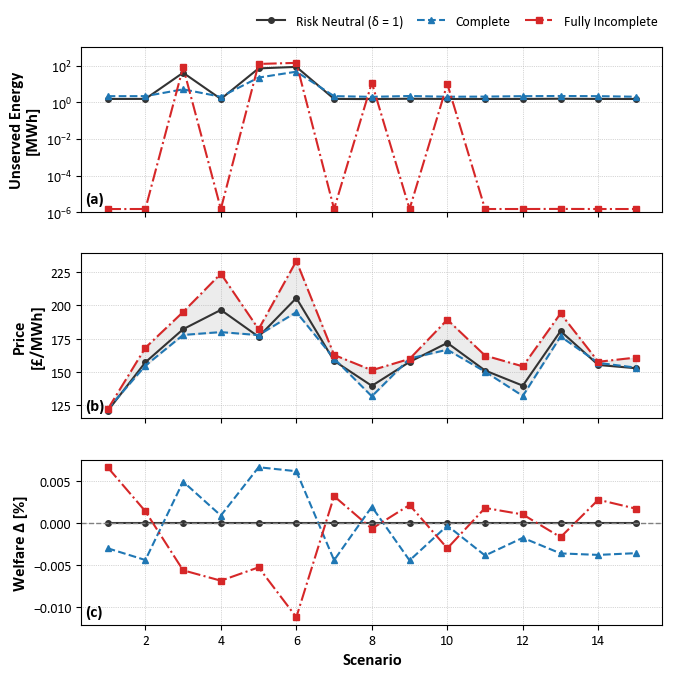

'\n# === Legend only at top subplot ===\n#axs[0].legend( loc=\'upper right\',frameon=True, ncol=1, prop=font_legend)\naxs[0].legend( frameon=True, ncol=1, prop=font_legend)\n\n# === Final Layout ===\nplt.tight_layout()\n\n# === Optional: Save as High-Res PDF ===\n# plt.savefig("market_comparison.pdf", dpi=300, bbox_inches=\'tight\')\n\nplt.show()\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['text.usetex'] = False
rcParams['axes.labelweight'] = 'bold'

# === Font Settings ===
font_label = {'fontsize': 12, 'fontweight': 'bold'}
font_tick = {'labelsize': 10}
font_legend = FontProperties(size=10)


scenarios = np.arange(1, 16)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
]

price_complete_050 = [
]
price_incomplete_050 = [
]

UE_risk_neutral = [
]
UE_complete_050 = [
]
UE_incomplete_050 = [
]
W_risk_neutral = [
]
W_complete_050 = [
]
W_incomplete_050 = [
]

# === Styling Definitions ===
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Fully Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o'},
    'Complete': {'marker': '^'},
    'Fully Incomplete': {'marker': 's'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',
    'Fully Incomplete': '#d62728'
}



# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 7.5), sharex=True, gridspec_kw={'hspace': 0.25})


# === Plot Functions ===
def plot_ue(ax):
    ax.plot(scenarios, UE_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, UE_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.set_yscale('log')
    ax.set_ylim(1e-6, 1e3)
    ax.set_ylabel("Unserved Energy\n[MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

def plot_price_with_band(ax):
    ax.plot(scenarios, price_risk_neutral, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_complete_050, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, price_incomplete_050, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    lower = np.minimum(price_complete_050, price_incomplete_050)
    upper = np.maximum(price_complete_050, price_incomplete_050)
    ax.fill_between(scenarios, lower, upper, color='gray', alpha=0.15)
    ax.set_ylabel("Price\n[$/MWh]", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

def plot_welfare_diff(ax):
    diff_risk = (np.array(W_risk_neutral) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_complete = (np.array(W_complete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100
    diff_incomplete = (np.array(W_incomplete_050) - np.array(W_risk_neutral)) / np.array(W_risk_neutral) * 100

    ax.plot(scenarios, diff_risk, label='Risk Neutral (δ = 1)', **markers['Risk Neutral'], color=colors['Risk Neutral'], linestyle=line_styles['Risk Neutral'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_complete, label='Complete', **markers['Complete'], color=colors['Complete'], linestyle=line_styles['Complete'], linewidth=1.5, markersize=4)
    ax.plot(scenarios, diff_incomplete, label='Fully Incomplete', **markers['Fully Incomplete'], color=colors['Fully Incomplete'], linestyle=line_styles['Fully Incomplete'], linewidth=1.5, markersize=4)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_ylabel("Welfare Δ [%]", **font_label)
    ax.set_xlabel("Scenario", **font_label)
    ax.tick_params(axis='both', **font_tick)
    ax.grid(True, linestyle=':', linewidth=0.5)

# === Plot Data ===
plot_ue(axs[0])
plot_price_with_band(axs[1])
plot_welfare_diff(axs[2])

# === Add Subplot Labels (a), (b), (c) ===
labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axs):
    ax.text(0.007, 0.12, labels[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

# === Collect Unique Legend Items ===
lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
unique = dict(zip(labels, lines))  # Remove duplicates

# === Add Legend at Top-Right in 3 Columns ===
fig.legend(unique.values(), unique.keys(),
           loc='upper right', bbox_to_anchor=(0.91, 0.94),
           frameon=False, prop=font_legend, ncol=3, columnspacing=1.0)

# === Tight layout without extra margin at top ===
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("market_comparison_with_legend_outside.pdf", dpi=300, bbox_inches='tight')
plt.savefig("market_comparison.png", dpi=400, bbox_inches='tight')
plt.show()


"""
# === Legend only at top subplot ===
#axs[0].legend( loc='upper right',frameon=True, ncol=1, prop=font_legend)
axs[0].legend( frameon=True, ncol=1, prop=font_legend)

# === Final Layout ===
plt.tight_layout()

# === Optional: Save as High-Res PDF ===
# plt.savefig("market_comparison.pdf", dpi=400, bbox_inches='tight')

plt.show()
"""

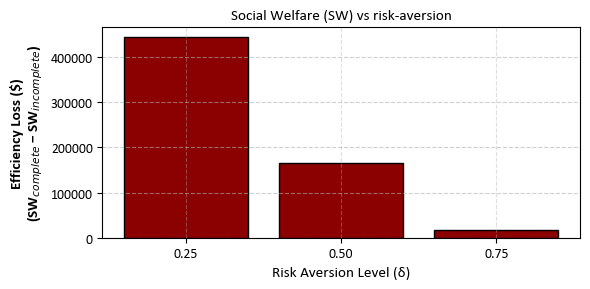

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Replace these with your actual values ===
deltas = [0.25, 0.5, 0.75]
sw_complete = [4.699031359803693e9, 4.709140350445262e9, 4.71923429212195e9]       # example social welfare values
sw_incomplete = [4.698587852200662e9, 4.708974276447182e9,4.71921828997875e9 ]      # example values

eff_loss = np.array(sw_complete) - np.array(sw_incomplete)

# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 3))

bars = ax.bar(deltas, eff_loss, width=0.2, color='#8B0000', edgecolor='black')

# Labels and grid
ax.set_ylabel("Efficiency Loss ($)\n(SW$_{complete}$ − SW$_{incomplete}$)", fontsize=11, fontweight='bold')
ax.set_xlabel("Risk Aversion Level (δ)", fontsize=11, fontweight='normal')
ax.set_xticks(deltas)
ax.set_xticklabels([f"{d:.2f}" for d in deltas])
ax.set_title("Social Welfare (SW) vs risk-aversion", fontsize=11)

# Gridlines on both axes
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig("socialwelfare.png", dpi=400, bbox_inches='tight')
plt.show()


In [297]:
import pandas as pd

# === Load your actual files ===
cf = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_capacity_factors_672_30yr_new_final_lf.csv")
demand = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_load_profiles_672_30yr_new_final.csv")
weights = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new_final.csv")

# === Reshape capacity factors to wide format ===
cf_wide = cf.pivot_table(index=["O", "T"], columns="G", values="value").reset_index()

# === Rename other columns ===
demand.rename(columns={"value": "demand"}, inplace=True)
weights.rename(columns={"value": "weight"}, inplace=True)

# === Merge all data on scenario (O) and time (T) ===
df = cf_wide.merge(demand, on=["O", "T"]).merge(weights, on=["O", "T"])

# === Compute weighted metrics per scenario ===
scenario_stats = []

for scenario in df["O"].unique():
    df_s = df[df["O"] == scenario]
    weight_sum = df_s["weight"].sum()

    windon_weighted = ((df_s["Wind_Onshore"]) * df_s["weight"]).sum() / weight_sum
    windoff_weighted = ((df_s["Wind_Offshore"]) * df_s["weight"]).sum() / weight_sum
    pv_weighted = (df_s["PV"] * df_s["weight"]).sum() / weight_sum
    demand_weighted = (df_s["demand"] * df_s["weight"]).sum()

    scenario_stats.append({
        "scenario": scenario,
        "windon_weighted": windon_weighted,
        "windoff_weighted": windoff_weighted,
        "pv_weighted": pv_weighted,
        "demand_weighted": demand_weighted
    })

stats_df = pd.DataFrame(scenario_stats)

stats_df.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\stats_for_scenario.csv", index=False)



Gas Utilisation

In [11]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
dispatch_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\H2_high_duration\gas_dispatch_delta_0.5.csv")
time_weight_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new.csv")

# Prepare tail scenario set
tail_scenarios = {10,14,15,17,18,19,20,21,25,28,2,3,5,6,9}

# Merge time weights into dispatch data
time_weight_df = time_weight_df.rename(columns={"T": "Time", "O": "Scenario", "value": "TimeWeight"})
print(dispatch_df.columns)
# Filter for gas generator safely
gas_dispatch_df = dispatch_df.loc[dispatch_df["Generator"].str.lower() == "nuclear"].copy()

# Ensure correct data type for Scenario
gas_dispatch_df["Scenario"] = gas_dispatch_df["Scenario"].astype(int)

# Merge with time weights
merged_df = gas_dispatch_df.merge(time_weight_df, on=["Time", "Scenario"], how="left")


merged_df["IsTail"] = merged_df["Scenario"].isin(tail_scenarios)

# Compute weighted dispatch
merged_df["WeightedDispatch"] = merged_df["Dispatch"] * merged_df["TimeWeight"]

# Aggregates and gas capacity
tail_dispatch = merged_df.loc[merged_df["IsTail"], "WeightedDispatch"].sum()
non_tail_dispatch = merged_df.loc[~merged_df["IsTail"], "WeightedDispatch"].sum()

total_hours_tail = merged_df.loc[merged_df["IsTail"], "TimeWeight"].sum()
total_hours_non_tail = merged_df.loc[~merged_df["IsTail"], "TimeWeight"].sum()

gas_capacity_mw = 3.999999
avg_mw_tail = tail_dispatch / total_hours_tail
avg_mw_non_tail = non_tail_dispatch / total_hours_non_tail
utilization_tail = avg_mw_tail / gas_capacity_mw
utilization_non_tail = avg_mw_non_tail / gas_capacity_mw

print({
    "Tail Dispatch (MWh)": tail_dispatch,
    "Non-Tail Dispatch (MWh)": non_tail_dispatch,
    "Avg MW Tail": avg_mw_tail,
    "Avg MW Non-Tail": avg_mw_non_tail,
    "Utilization Tail (%)": utilization_tail * 100,
    "Utilization Non-Tail (%)": utilization_non_tail * 100
})


Index(['Time', 'Scenario', 'Generator', 'Dispatch'], dtype='object')
{'Tail Dispatch (MWh)': 492156.48739765654, 'Non-Tail Dispatch (MWh)': 496295.4697001864, 'Avg MW Tail': 3.745483161321587, 'Avg MW Non-Tail': 3.776982265602636, 'Utilization Tail (%)': 93.6371024423153, 'Utilization Non-Tail (%)': 94.42458024621097}


In [6]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\prices_delta_0.5.csv")
# Group by scenario and compute stats
stats = df.groupby("O")["price"].agg(
    avg_price="mean",
    std_price="std",
    min_price="min",
    max_price="max"
).reset_index()

# Save to a new CSV (optional)
stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\scenario_price_stats.csv", index=False)
# Display result
print(stats)

     O   avg_price   std_price    min_price    max_price
0    1  -92.415409  301.631163 -5506.241616     0.002468
1    2  -83.741818   87.115456 -1538.747856     0.000326
2    3 -130.693111  558.311685 -7174.356202     0.001287
3    4  -87.415104   65.158790  -471.985478    -0.000727
4    5  -83.292809  203.042581 -4998.012318     0.000290
5    6  -74.593552   67.137158  -381.861325     0.001177
6    7 -100.731669  373.831197 -8998.617740     0.005556
7    8  109.940133  230.367473     0.001100  2951.112739
8    9   74.022911   67.476439    -0.001404   364.001419
9   10   86.636250  213.793968    -0.000791  5335.802815
10  11   97.956290  304.861787     0.000355  7802.504080
11  12  107.904334  319.004073    -0.002740  5904.166880
12  13   96.568151  148.690778     0.001793  2903.997916
13  14  105.662751  329.077378    -0.001289  7000.894498
14  15  103.087852  349.178257    -0.000272  8284.161060
15  16   93.930756  181.975261     0.001851  4504.922401
16  17   87.523139  201.144475 

C:\Users\user\AppData\Local\Temp\ipykernel_17040\80581793.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
C:\Users\user\AppData\Local\Temp\ipykernel_17040\80581793.py:47: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.violinplot(
C:\Users\user\AppData\Local\Temp\ipykernel_17040\80581793.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore'], fontsize=11)


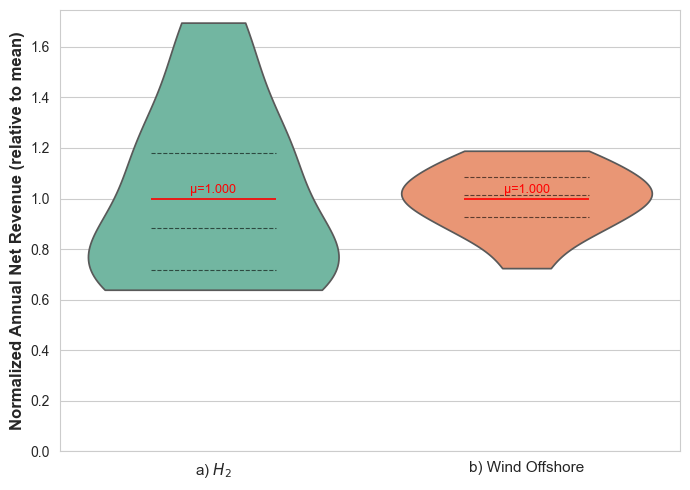

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'
sns.set_style("whitegrid")

# === Revenue data ===
ldes_revenue = [
    1161488.501, 1501133.276, 618722.9102, 1119871.887, 655255.6104,
    671269.4626, 1120988.811, 686365.2323, 992130.1527, 854546.4378,
    705607.2075, 723114.2518, 751057.2526, 1641761.313, 1316768.364
]

wind_offshore_revenue = [
    22606753.61, 31285180.89, 27071072.22, 23182890.61, 19351075.09,
    29580673.88, 28451056.3, 25418342, 24119230.21, 31753236.87,
    26276421.33, 26005490.88, 27474021.54, 27974040.29, 30002949.57
]

# === Installed capacity (MW) ===
ldes_capacity_mw = 1.51
wind_capacity_mw = 89.50

# === Normalize revenue per MW ===
ldes_revenue_per_mw = [r / ldes_capacity_mw for r in ldes_revenue]
wind_revenue_per_mw = [r * 1.475859063 / wind_capacity_mw for r in wind_offshore_revenue]

# === Normalize EACH tech by its own total revenue ===
ldes_mean = np.mean(ldes_revenue_per_mw)
wind_mean = np.mean(wind_revenue_per_mw)

ldes_normalized = [r / ldes_mean for r in ldes_revenue_per_mw]
wind_normalized = [r / wind_mean for r in wind_revenue_per_mw]

# === Combine ===
data = pd.DataFrame({
    'Technology': ['H₂'] * 15 + ['Wind Offshore'] * 15,
    'Normalized Revenue': ldes_normalized + wind_normalized
})

# === Plot ===
plt.figure(figsize=(7, 5))
ax = sns.violinplot(
    data=data,
    x="Technology",
    y="Normalized Revenue",
    palette=sns.color_palette("Set2"),
    inner=None,
    cut=0
)

# --- Add stats per tech ---
for i, tech in enumerate(['H₂', 'Wind Offshore']):
    values = data[data['Technology'] == tech]['Normalized Revenue']
    mean = values.mean()
    q25 = values.quantile(0.25)
    q50 = values.median()
    q75 = values.quantile(0.75)

    # Plot lines
    for y in [q25, q50, q75]:
        ax.hlines(y, i - 0.2, i + 0.2, colors='black', linestyle='--', linewidth=0.8, alpha=0.6)
    ax.hlines(mean, i - 0.2, i + 0.2, colors='red', linestyle='-', linewidth=1.2)

    # Mean label
    ax.text(i, mean + 0.01, f"μ={mean:.3f}", ha='center', va='bottom', fontsize=9, color='red')

# === Style ===
ax.set_ylabel("Normalized Annual Net Revenue (relative to mean)", fontsize=12, fontweight='bold')
ax.set_xlabel("")
#ax.set_title("Normalized Net Revenue Distribution by Technology", fontsize=13, weight='bold')
ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore'], fontsize=11)
plt.ylim(0, max(data["Normalized Revenue"]) + 0.05)
plt.tight_layout()
plt.show()

# === Save (optional) ===
# plt.savefig("per_tech_normalized_violin.png", dpi=400, bbox_inches='tight')


C:\Users\user\AppData\Local\Temp\ipykernel_17040\3843327426.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\user\AppData\Local\Temp\ipykernel_17040\3843327426.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore', 'c) Wind Onshore', 'd) PV'], fontsize=11)


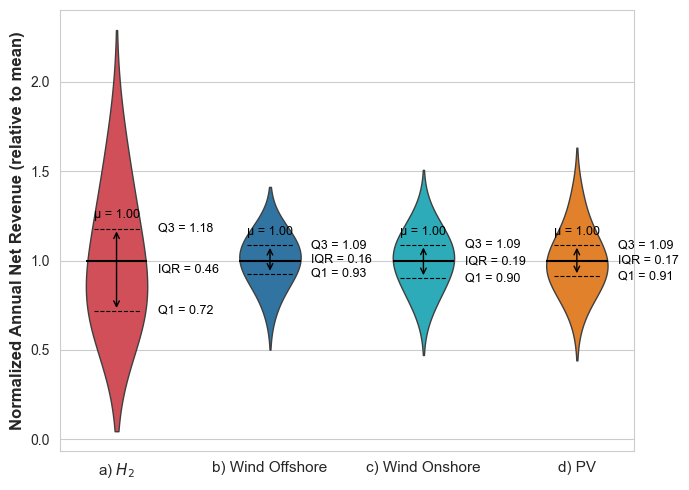

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'
sns.set_style("whitegrid")

# === Revenue data ===
ldes_revenue = [
    1161488.501, 1501133.276, 618722.9102, 1119871.887, 655255.6104,
    671269.4626, 1120988.811, 686365.2323, 992130.1527, 854546.4378,
    705607.2075, 723114.2518, 751057.2526, 1641761.313, 1316768.364
]

wind_offshore_revenue = [
    22606753.61, 31285180.89, 27071072.22, 23182890.61, 19351075.09,
    29580673.88, 28451056.3, 25418342, 24119230.21, 31753236.87,
    26276421.33, 26005490.88, 27474021.54, 27974040.29, 30002949.57
]
wind_onshore_revenue = [
    10158434.57,
    13259977.37,
    11414165.4,
    9767929.437,
    8579439.071,
    12400236.33,
    12287555.29,
    11245713.21,
    10062037.81,
    13715447.77,
    11839543.77,
    11936352.92,
    12562424.15,
    14892888.45,
    13767944.98
]
pv_revenue = [
    17187237.39,
    19876915.26,
    14725351.11,
    13025697.66,
    11439488.64,
    16189238.84,
    17257135.69,
    14682651.7,
    14247039.93,
    17354311.39,
    15701459.31,
    13673750.99,
    15084893.9,
    15689206.77,
    21389868.1
]


# === Installed capacity (MW) ===
ldes_capacity_mw = 1.51
wind_capacity_mw = 89.50
wind_on = 49.73
pvcap = 143.86

# === Normalize revenue per MW ===
ldes_revenue_per_mw = [r / ldes_capacity_mw for r in ldes_revenue]
wind_revenue_per_mw = [r * 1.475859063 / wind_capacity_mw for r in wind_offshore_revenue]
wind_on_revenue_per_mw = [r / wind_on for r in wind_onshore_revenue]
pv_revenue_per_mw = [r / pvcap for r in pv_revenue]

# === Normalize each tech by its own mean ===
ldes_mean = np.mean(ldes_revenue_per_mw)
wind_mean = np.mean(wind_revenue_per_mw)
wind_on_mean = np.mean(wind_on_revenue_per_mw)
pv_mean = np.mean(pv_revenue_per_mw)

ldes_normalized = [r / ldes_mean for r in ldes_revenue_per_mw]
wind_normalized = [r / wind_mean for r in wind_revenue_per_mw]
wind_on_normalized = [r / wind_on_mean for r in wind_on_revenue_per_mw]
pv_normalized = [r / pv_mean for r in pv_revenue_per_mw]

# === Combine ===
data = pd.DataFrame({
    'Technology': ['$H_{2}$'] * 15 + ['Wind Offshore'] * 15 + ['Wind Onshore']*15 + ['PV']*15,
    'Normalized Revenue': ldes_normalized + wind_normalized + wind_on_normalized + pv_normalized
})

# === Plot ===
palette = {
    '$H_{2}$': '#e63946',         # greenish
    'Wind Offshore': '#1f77b4',   # orange
    'Wind Onshore': '#17becf',    # blue
    'PV': '#ff7f0e'               # pink
}

fig, ax = plt.subplots(figsize=(7, 5))
sns.violinplot(
    data=data,
    x="Technology",
    y="Normalized Revenue",
    palette=palette,
    inner=None,
    #cut=0,
    width=0.4,
    linewidth=1,
    bw_adjust=1.5,
    ax=ax
)

# --- Add clean stats ---
for i, tech in enumerate(['$H_{2}$', 'Wind Offshore','Wind Onshore','PV']):
    values = data[data['Technology'] == tech]['Normalized Revenue']
    mean = values.mean()
    q25 = values.quantile(0.25)
    median = values.median()
    q75 = values.quantile(0.75)

    # Lines
    ax.hlines(mean, i - 0.2, i + 0.2, colors='black', linewidth=1.5)
    ax.hlines([q25, q75], i - 0.15, i + 0.15, colors='black', linestyle='--', linewidth=0.8)

    # IQR arrow
    ax.annotate(
        '', xy=(i, q75), xytext=(i, q25),
        arrowprops=dict(arrowstyle='<->', color='black', lw=1),
        annotation_clip=False
    )

    # === Adjusted label positions ===
    offset = 0.27  # space to the right of violin
    ax.text(i + offset, q25, f"Q1 = {q25:.2f}", fontsize=9, va='center', ha='left', color='black')
    ax.text(i + offset, q75, f"Q3 = {q75:.2f}", fontsize=9, va='center', ha='left', color='black')
    ax.text(i, q75+0.04, f"μ = {mean:.2f}", fontsize=9, va='bottom', ha='center', color='black')
    ax.text(i + offset, (q25 + q75) / 2, f"IQR = {q75 - q25:.2f}",
            fontsize=9, va='center', ha='left', color='black')


# === Labels and formatting ===
ax.set_ylabel("Normalized Annual Net Revenue (relative to mean)", fontsize=12, fontweight='bold')
ax.set_xlabel("")
ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore', 'c) Wind Onshore', 'd) PV'], fontsize=11)
#plt.ylim(0.6, 1.7)
plt.tight_layout()

# === Show / Save ===
plt.show()
# fig.savefig("clean_violin_final.png", dpi=400, bbox_inches='tight')


        O    T  value
0      10    1     12
1      10    2     11
2      10    3     10
3      10    4     19
4      10    5     19
...    ..  ...    ...
20155   9  668     30
20156   9  669     14
20157   9  670     28
20158   9  671     11
20159   9  672     23

[20160 rows x 3 columns]
✅ No NaN values in merged dataframe.

📦 Analyzing Storage Asset: H2

=== Frequency of Binding Constraints (|dual| > 1e-06) ===
Dual_discharge:
  Unweighted: 10080 binding steps (100.00%)
  Weighted:   131400.00 of total weight (100.00%)
Dual_charge:
  Unweighted: 10080 binding steps (100.00%)
  Weighted:   131400.00 of total weight (100.00%)
Dual_energy:
  Unweighted: 298 binding steps (2.96%)
  Weighted:   3975.00 of total weight (3.03%)


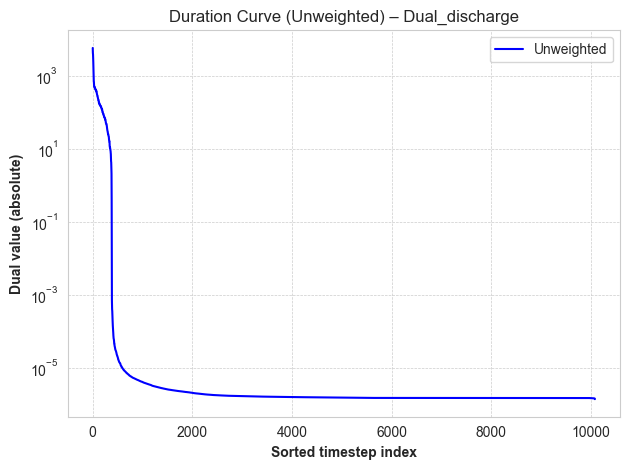

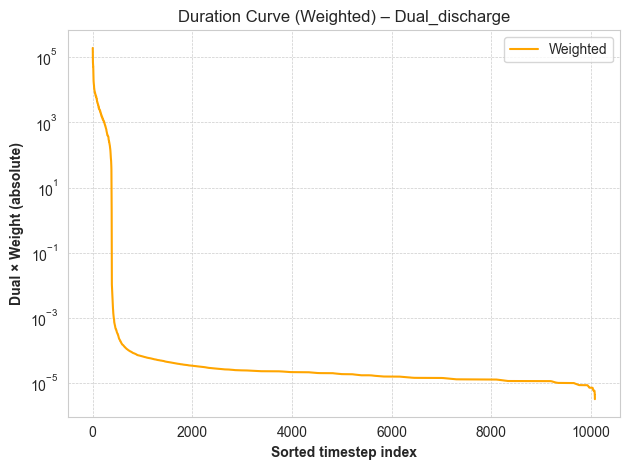

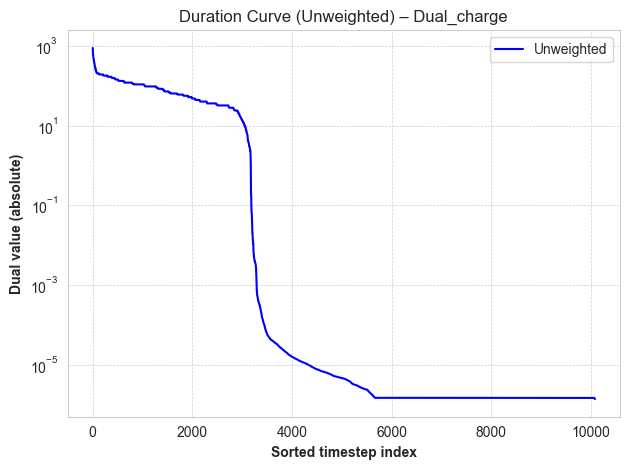

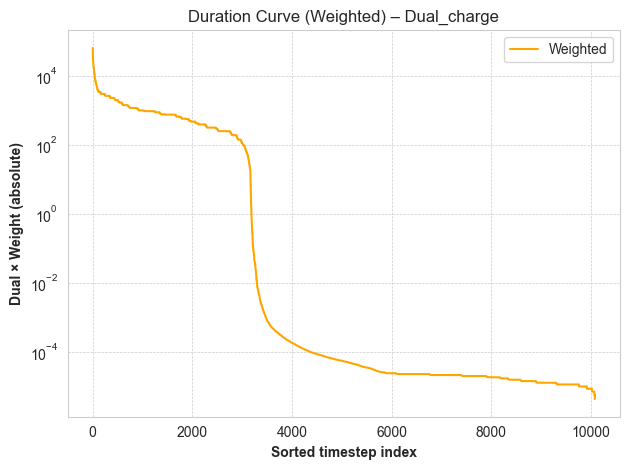

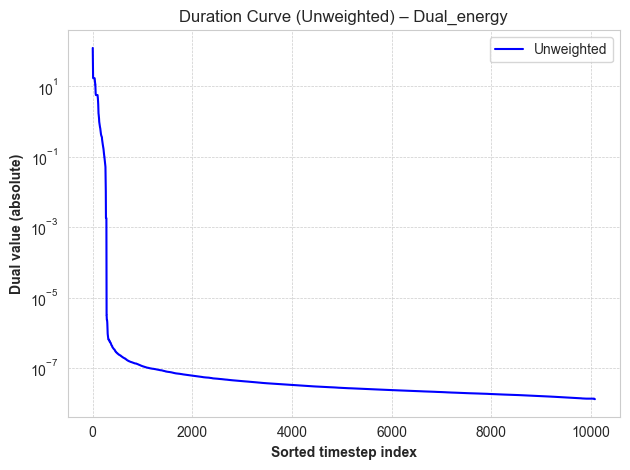

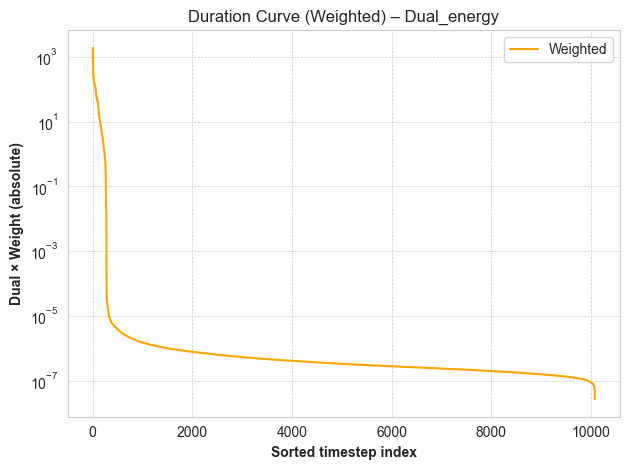

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_duration_curves_absolute(df, dual, weight_col='Weight'):
    abs_dual = df[dual].abs()
    weights = df[weight_col]

    # Sort values
    sorted_abs_dual = abs_dual.sort_values(ascending=False).reset_index(drop=True)
    sorted_weighted_dual = (abs_dual * weights).sort_values(ascending=False).reset_index(drop=True)

    # Plot 1: Unweighted
    plt.figure()
    plt.plot(sorted_abs_dual, label='Unweighted', color='blue')
    plt.yscale('log')
    plt.title(f"Duration Curve (Unweighted) – {dual}")
    plt.xlabel("Sorted timestep index")
    plt.ylabel("Dual value (absolute)")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend()

    # Plot 2: Weighted
    plt.figure()
    plt.plot(sorted_weighted_dual, label='Weighted', color='orange')
    plt.yscale('log')
    plt.title(f"Duration Curve (Weighted) – {dual}")
    plt.xlabel("Sorted timestep index")
    plt.ylabel("Dual × Weight (absolute)")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend()


def report_dual_activity(df, duals, threshold=1e-6, weight_col='Weight'):
    print(f"\n=== Frequency of Binding Constraints (|dual| > {threshold:.0e}) ===")
    
    total_timesteps = df.shape[0]
    total_weight = df[weight_col].sum()

    for dual in duals:
        abs_dual = df[dual].abs()
        is_binding = abs_dual > threshold

        # Unweighted frequency
        count_binding = is_binding.sum()
        percent_binding = 100 * count_binding / total_timesteps

        # Weighted frequency
        weight_binding = df.loc[is_binding, weight_col].sum()
        weight_percent = 100 * weight_binding / total_weight

        print(f"{dual}:")
        print(f"  Unweighted: {count_binding} binding steps ({percent_binding:.2f}%)")
        print(f"  Weighted:   {weight_binding:.2f} of total weight ({weight_percent:.2f}%)")


selected_storage = "H2"  # Change to "BESS" to analyze BESS
# Paths to the CSV files
duals_path = r"C:\Users\user\Downloads\trycodes_3\scarcity_rent_delta_0.5.csv"
weights_path = r"C:\Users\user\Downloads\trycodes_3\data_final\f672\concatenated_weights_672_30yr_new.csv"

# Filter for relevant scenarios and storage types
scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]
storages = ["H2", "BESS"]
# Duals of interest
duals = ["Dual_discharge", "Dual_charge", "Dual_energy"]
threshold = 1e-6


# Load data
duals_df = pd.read_csv(duals_path)
weights_df = pd.read_csv(weights_path)
print(weights_df)
# Rename columns for clarity
weights_df.columns = ['Scenario', 'Time', 'Weight']


duals_df = duals_df[duals_df["Scenario"].isin(scenarios)]
duals_df = duals_df[duals_df["Storage"] == selected_storage]
weights_df = weights_df[weights_df["Scenario"].isin(scenarios)]
# Merge weights into duals dataframe
merged_df = pd.merge(duals_df, weights_df, how='left', on=['Scenario', 'Time'])

# Check for any NaNs in merged dataframe
if merged_df.isna().any().any():
    print("⚠️ Warning: There are missing (NaN) values in the merged dataframe.")
    print(merged_df.isna().sum())
    # Optional: stop execution if NaNs are critical
    # raise ValueError("Missing values found in merged dataframe. Check weights and merge keys.")
else:
    print("✅ No NaN values in merged dataframe.")



# === CONVERT DUALS TO ABSOLUTE VALUES ===
for dual in duals:
    merged_df[dual] = merged_df[dual].abs()
    

# === ANALYSIS ===
print(f"\n📦 Analyzing Storage Asset: {selected_storage}")    
report_dual_activity(merged_df, duals, threshold=threshold)

for dual in duals:
    plot_duration_curves_absolute(merged_df, dual)

plt.show()

✅ No NaN values in merged dataframe.

1. Energy level at end of each month:
 month  energy_level energy_percent
     1     97.614767         60.06%
     2     86.466840         53.20%
     3     72.722590         44.75%
     4     67.699578         41.66%
     5     98.640617         60.69%
     6     84.481630         51.98%
     7     77.694112         47.81%
     8     63.592872         39.13%
     9     75.646849         46.55%
    10    106.505437         65.53%
    11     83.937095         51.65%
    12    146.930520         90.41%

2. Average weighted charging hours per scenario (>1e-06 MW): 4600.60 hours
   Average weighted discharging hours per scenario (>1e-06 MW): 5199.00 hours

3. Average energy charged per scenario (>1e-06 MW): 6136.46 MWh
   Average energy discharged per scenario (>1e-06 MW): 2362.23 MWh


C:\Users\user\AppData\Local\Temp\ipykernel_17040\4048777906.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby("SOC Bin (%)")["time_weight"]


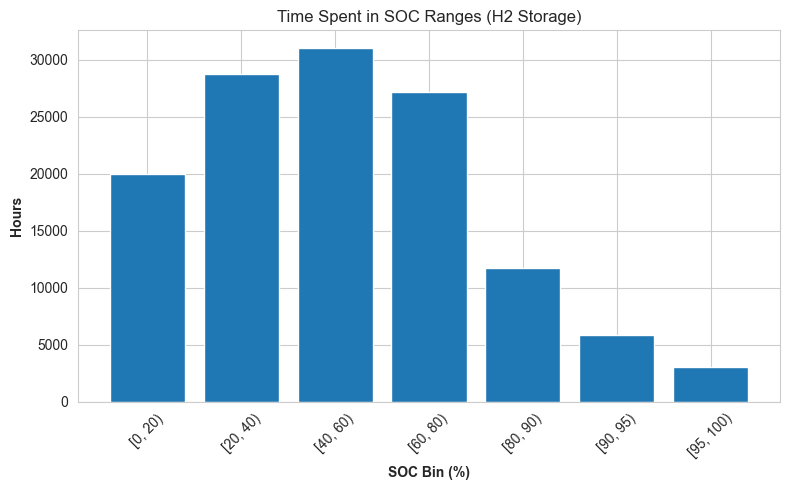

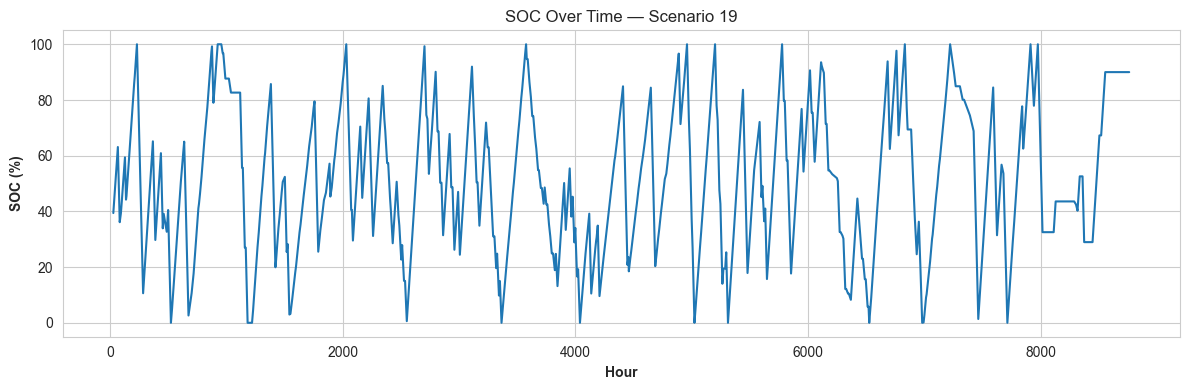


 Total time at or near FULL (≥ 99%): 3946.00 hours
 Total time at or near EMPTY (≤ 1%): 4000.00 hours

 Total H₂ charged into storage: 92046.86 MWh
 Total H₂ discharged from storage: 35433.50 MWh


C:\Users\user\AppData\Local\Temp\ipykernel_17040\4048777906.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discharge_cycles.groupby("Depth Bin (%)")["Weighted Hours"]


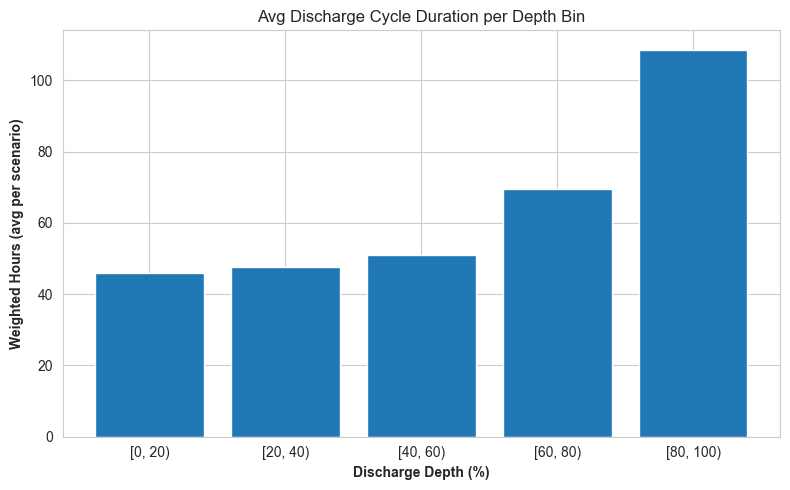

In [94]:
import pandas as pd

# Constants
selected_storage = "H2"
scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]
ENERGY_CAPACITY = 162.522716388603  # MWh

# File paths
energy_data_path = r"C:\Users\user\Downloads\trycodes_3\energy_charge_discharge_delta_0.5.csv"
weights_path = r"C:\Users\user\Downloads\trycodes_3\data_final\f672\concatenated_weights_672_30yr_new.csv"

# Load CSVs
energy_df = pd.read_csv(energy_data_path)
weights_df = pd.read_csv(weights_path)

# Rename columns for clarity
weights_df = weights_df.rename(columns={"O": "Scenario", "T": "Time", "value": "time_weight"})

# Apply filtering
energy_df = energy_df[energy_df["Scenario"].isin(scenarios)]
energy_df = energy_df[energy_df["Storage"] == selected_storage]
weights_df = weights_df[weights_df["Scenario"].isin(scenarios)]

# Merge both dataframes on Scenario and Time
merged_df = pd.merge(energy_df, weights_df, on=["Scenario", "Time"], how="left")

# Check for NaNs
if merged_df.isna().any().any():
    print("⚠️ Warning: There are missing (NaN) values in the merged dataframe.")
    print(merged_df.isna().sum())
    # Optional: stop execution if NaNs are critical
    # raise ValueError("Missing values found in merged dataframe. Check weights and merge keys.")
else:
    print("✅ No NaN values in merged dataframe.")

# Calculate cumulative time (hours) for each scenario
merged_df["cumulative_hour"] = merged_df.groupby("Scenario")["time_weight"].cumsum()
merged_df["hour_rounded"] = merged_df["cumulative_hour"].round().astype(int)

# Assign month based on rounded hour (730 hours/month)
#merged_df["month"] = ((merged_df["hour_rounded"] - 1) // 730 + 1).clip(upper=12)
merged_df["month"] = ((merged_df["hour_rounded"] - 1) // 730 + 1)

# 1. Energy Level at End of Each Month
monthly_energy = (
    merged_df.sort_values(["Scenario", "cumulative_hour"])
    .groupby(["Scenario", "month"])
    .tail(1)
    .groupby("month")["energy_level"]
    .mean()
    .reset_index()
)
monthly_energy["energy_percent"] = 100 * monthly_energy["energy_level"] / ENERGY_CAPACITY

print("\n1. Energy level at end of each month:")
print(monthly_energy.to_string(index=False, formatters={"energy_percent": "{:.2f}%".format}))



# Threshold for meaningful charge/discharge (in MW)
CHARGE_DISCHARGE_THRESHOLD = 1e-6 # Adjust as needed

# Filter based on threshold
charging_mask = merged_df["Charge"] > CHARGE_DISCHARGE_THRESHOLD
discharging_mask = merged_df["Discharge"] > CHARGE_DISCHARGE_THRESHOLD

# 2. Charging/discharging hours per scenario (with threshold)
charging_by_scenario = merged_df[charging_mask].groupby("Scenario")["time_weight"].sum()
discharging_by_scenario = merged_df[discharging_mask].groupby("Scenario")["time_weight"].sum()

charging_hours_avg = charging_by_scenario.mean()
discharging_hours_avg = discharging_by_scenario.mean()

print(f"\n2. Average weighted charging hours per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {charging_hours_avg:.2f} hours")
print(f"   Average weighted discharging hours per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {discharging_hours_avg:.2f} hours")

# 3. Total energy charged/discharged per scenario (with threshold)
merged_df["charged_energy_MWh"] = merged_df["Charge"] * merged_df["time_weight"]
merged_df["discharged_energy_MWh"] = merged_df["Discharge"] * merged_df["time_weight"]

energy_by_scenario = merged_df[charging_mask | discharging_mask].groupby("Scenario")[["charged_energy_MWh", "discharged_energy_MWh"]].sum()

avg_charged_energy = energy_by_scenario["charged_energy_MWh"].mean()
avg_discharged_energy = energy_by_scenario["discharged_energy_MWh"].mean()

print(f"\n3. Average energy charged per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {avg_charged_energy:.2f} MWh")
print(f"   Average energy discharged per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {avg_discharged_energy:.2f} MWh")

#!pip install fatpack
!pip install rainflow
#rainflow algorithm
import numpy as np
import pandas as pd
#from fatpack import find_peaks, rainflow_cycles
import rainflow
# --- Compute SOC (%)
merged_df["SOC"] = 100 * merged_df["energy_level"] / ENERGY_CAPACITY

# === 1. Histogram: Time spent in each SOC range (recommended bins for H₂)
soc_bins = [0, 20, 40, 60, 80, 90, 95, 100]
merged_df["SOC Bin (%)"] = pd.cut(merged_df["SOC"], bins=soc_bins, right=False)

soc_time = (
    merged_df.groupby("SOC Bin (%)")["time_weight"]
    .sum()
    .reset_index(name="Total Hours")
)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(soc_time["SOC Bin (%)"].astype(str), soc_time["Total Hours"])
plt.title("Time Spent in SOC Ranges (H2 Storage)")
plt.ylabel("Hours")
plt.xlabel("SOC Bin (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Plot: SOC over time (pick one scenario)
example_scenario = scenarios[0]
scenario_df = merged_df[merged_df["Scenario"] == example_scenario].sort_values("cumulative_hour")

plt.figure(figsize=(12, 4))
plt.plot(scenario_df["cumulative_hour"], scenario_df["SOC"], label=f"Scenario {example_scenario}")
plt.title(f"SOC Over Time — Scenario {example_scenario}")
plt.xlabel("Hour")
plt.ylabel("SOC (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. Time spent at full / empty
SOC_FULL_THRESH = 99  # can adjust
SOC_EMPTY_THRESH = 1

full_time = merged_df.loc[merged_df["SOC"] >= SOC_FULL_THRESH, "time_weight"].sum()
empty_time = merged_df.loc[merged_df["SOC"] <= SOC_EMPTY_THRESH, "time_weight"].sum()

print(f"\n Total time at or near FULL (≥ {SOC_FULL_THRESH}%): {full_time:.2f} hours")
print(f" Total time at or near EMPTY (≤ {SOC_EMPTY_THRESH}%): {empty_time:.2f} hours")

# === 4. Throughput calculation (total H2 in/out)
THRESH = 1e-6  # MW, to filter out noise

charge_energy = (
    merged_df.loc[merged_df["Charge"] > THRESH, "Charge"] *
    merged_df.loc[merged_df["Charge"] > THRESH, "time_weight"]
).sum()

discharge_energy = (
    merged_df.loc[merged_df["Discharge"] > THRESH, "Discharge"] *
    merged_df.loc[merged_df["Discharge"] > THRESH, "time_weight"]
).sum()

print(f"\n Total H₂ charged into storage: {charge_energy:.2f} MWh")
print(f" Total H₂ discharged from storage: {discharge_energy:.2f} MWh")

# === 5. Rainflow: Cycle frequency and depth
def compute_discharge_cycles(df, scenario_id):
    df_scen = df[df["Scenario"] == scenario_id].sort_values("cumulative_hour").reset_index(drop=True)
    soc_series = df_scen["SOC"].values
    time_weights = df_scen["time_weight"].values
    cycles = rainflow.extract_cycles(soc_series)

    cycle_data = []
    for amp, mean, count, idx_start, idx_end in cycles:
        if idx_end >= len(time_weights):
            continue
        if soc_series[idx_end] < soc_series[idx_start]:  # Only discharging
            cycle_depth = 2 * amp
            cycle_duration = time_weights[idx_start:idx_end + 1].sum()
            weighted_hours = count * cycle_duration
            cycle_data.append({
                "Discharge Depth (%)": cycle_depth,
                "Count": count,
                "Weighted Hours": weighted_hours,
                "Scenario": scenario_id
            })
    return pd.DataFrame(cycle_data)

# Apply to all scenarios
discharge_cycles = pd.concat(
    [compute_discharge_cycles(merged_df, s) for s in scenarios],
    ignore_index=True
)

# Bin by discharge depth (recommended for H2: broader)
depth_bins = [0, 20, 40, 60, 80, 100]
discharge_cycles["Depth Bin (%)"] = pd.cut(discharge_cycles["Discharge Depth (%)"], bins=depth_bins, right=False)

# Summarize
depth_summary = (
    discharge_cycles.groupby("Depth Bin (%)")["Weighted Hours"]
    .mean()
    .reset_index(name="Avg Cycle Hours")
)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(depth_summary["Depth Bin (%)"].astype(str), depth_summary["Avg Cycle Hours"])
plt.title("Avg Discharge Cycle Duration per Depth Bin")
plt.xlabel("Discharge Depth (%)")
plt.ylabel("Weighted Hours (avg per scenario)")
plt.grid(True)
plt.tight_layout()
plt.show()